In [14]:
import pandas as pd
import numpy as np

### 파일 불러오기

In [124]:
data = pd.read_excel("data/data_weather.xlsx")
data.head()

,타임스탬프,귀하의 성별은 무엇입니까?,귀하의 연령대는 무엇입니까?,귀하의 거주 지역은 어디입니까?,오늘 기분은 어떠십니까?,1순위 음식 분야,2순위 음식 분야,3순위 음식 분류,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온(°C),강수량(mm),습도(%),현지기압(hPa),전운량(10분위)
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   타임스탬프              147 non-null    object 
 1   귀하의 성별은 무엇입니까?     147 non-null    object 
 2   귀하의 연령대는 무엇입니까?    147 non-null    object 
 3   귀하의 거주 지역은 어디입니까?  147 non-null    object 
 4   오늘 기분은 어떠십니까?      147 non-null    object 
 5   1순위 음식 분야          147 non-null    object 
 6   2순위 음식 분야          147 non-null    object 
 7   3순위 음식 분류          147 non-null    object 
 8   1_한식               56 non-null     object 
 9   2_한식               34 non-null     object 
 10  3_한식               31 non-null     object 
 11  1_분식               12 non-null     object 
 12  2_분식               15 non-null     object 
 13  3_분식               23 non-null     object 
 14  1_양식               35 non-null     object 
 15  2_양식               32 non-null     object 
 16  3_양식               28 non-

# 전처리

In [126]:
# 결측치 확인
data.isnull().sum()

타임스탬프                  0
귀하의 성별은 무엇입니까?         0
귀하의 연령대는 무엇입니까?        0
귀하의 거주 지역은 어디입니까?      0
오늘 기분은 어떠십니까?          0
1순위 음식 분야              0
2순위 음식 분야              0
3순위 음식 분류              0
1_한식                  91
2_한식                 113
3_한식                 116
1_분식                 135
2_분식                 132
3_분식                 124
1_양식                 112
2_양식                 115
3_양식                 119
1_일식                 118
2_일식                 114
3_일식                 111
1_중식                 132
2_중식                 114
3_중식                 118
기온(°C)                 0
강수량(mm)                0
습도(%)                  0
현지기압(hPa)              0
전운량(10분위)              0
dtype: int64

### 컬럼명 변경

In [127]:
data.columns

Index(['타임스탬프', '귀하의 성별은 무엇입니까?', '귀하의 연령대는 무엇입니까?', '귀하의 거주 지역은 어디입니까?',
       '오늘 기분은 어떠십니까?', '1순위 음식 분야', '2순위 음식 분야', '3순위 음식 분류', '1_한식', '2_한식',
       '3_한식', '1_분식', '2_분식', '3_분식', '1_양식', '2_양식', '3_양식', '1_일식', '2_일식',
       '3_일식', '1_중식', '2_중식', '3_중식', '기온(°C)', '강수량(mm)', '습도(%)',
       '현지기압(hPa)', '전운량(10분위)'],
      dtype='object')

In [128]:
data.rename(columns={'타임스탬프':'시간대',
                     '귀하의 성별은 무엇입니까?':'성별',
                     '귀하의 연령대는 무엇입니까?':'연령대',
                     '귀하의 거주 지역은 어디입니까?':'지역',
                     '오늘 기분은 어떠십니까?':'기분',
                     '1순위 음식 분야':'1순위',
                     '2순위 음식 분야':'2순위',
                     '3순위 음식 분류':'3순위',
                     '기온(°C)':'기온',
                     '강수량(mm)':'강수량',
                     '습도(%)':'습도',
                     '현지기압(hPa)':'기압',
                     '전운량(10분위)':'전운량'}, inplace=True)

In [129]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


### 날짜, 시간 열 추가

In [130]:
# data['시간대'] = pd.to_datetime(data['시간대'])

In [92]:
# data['월'] = data['시간'].dt.month
# data['일'] = data['시간'].dt.day
# data['시'] = data['시간'].dt.hour
# data['분'] = data['시간'].dt.minute

In [132]:
# data['날짜'] = data['시간대'].dt.strftime('%m-%d')
# data['시간'] = data['시간대'].dt.strftime('%H')

### 입력 데이터 값 전처리

In [134]:
data.loc[(data['지역']=='수도권 (경기, 인천)'), '지역'] = '수도권'
data.loc[(data['연령대']=='청소년 (~만 19세 미만)'), '연령대'] = '청소년'
data.loc[(data['연령대']=='청년 (만 19세~만 34세 이하)'), '연령대'] = '청년'
data.loc[(data['연령대']=='중장년 (만 35세~만 64세 이하)'), '연령대'] = '중장년'
data.loc[(data['연령대']=='노년 (만 65세 이상)'), '연령대'] = '노년'

In [135]:
data.loc[(data['기분']=='행복하다 · 즐겁다 · 신난다'), '기분'] = '행복'
data.loc[(data['기분']=='화가 난다 · 짜증난다'), '기분'] = '분노'
data.loc[(data['기분']=='아무 생각 없다'), '기분'] = '중립'
data.loc[(data['기분']=='우울하다 · 피곤하다 · 힘들다'), '기분'] = '우울'

In [136]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년,수도권,행복,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년,서울,분노,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년,서울,중립,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년,서울,행복,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년,경상도,행복,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


## EDA

In [ ]:
df['dow'] = df['dates'].dt.day_name()

## Feature Engineering
## 더미화 (One-Hot Encoding)

In [144]:
# 사용자가 선택한 메뉴만 뽑아내어 split 하는 Code

menu_data = data.iloc[:, 8:23]

for i in range(len(menu_data)):
    menu_data.iloc[i] = menu_data.iloc[i].str.split(', ')
    
menu_data

,1_한식,2_한식,3_한식,1_분식,2_분식,3_분식,1_양식,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식
0,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,[짬뽕]
1,[불고기],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[메밀소바],NaN,[볶음밥],NaN
2,NaN,NaN,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,[스테이크],NaN,"[돈가스, 메밀소바]",NaN,NaN,NaN,NaN,NaN
3,NaN,[비빔밥],NaN,NaN,NaN,[떡볶이],NaN,NaN,NaN,[초밥],NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,[떡볶이],[햄버거],NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,NaN,NaN,NaN,NaN,NaN,NaN,[햄버거],NaN,NaN,NaN,NaN,"[돈가스, 초밥, 우동]",NaN,[짜장면],NaN
143,NaN,"[불고기, 김치찌개, 칼국수]",NaN,NaN,NaN,NaN,NaN,NaN,"[햄버거, 스테이크]","[돈가스, 초밥, 우동]",NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,[김치찌개],NaN,NaN,NaN,[스테이크],NaN,NaN,NaN,NaN,NaN,NaN,[짜장면],NaN
145,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[초밥],NaN,[볶음밥],NaN


In [145]:
# 각 행의 메뉴를 한 리스트로 합치고, 이를 각 행 번호를 key로 갖는 딕셔너리로 만드는 Code

tmp_list = []
menu_dic = {}

for i in range(len(menu_data)):
    temp = menu_data.loc[i]
    for j in range(len(temp)):
        
        if type(temp.iloc[j]) == list:
            
            tmp_list += temp.iloc[j]
    
    menu_dic[i] = tmp_list
    tmp_list = []

In [146]:
# 각 카테고리에 해당하는 메뉴는 처음에 0으로 만들고,
## 사용자가 선택한 데이터를 1로 만드는 Code

category_dic = {'한식': ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개'],
          '분식': ['떡볶이', '김밥'],
          '양식': ['파스타', '스테이크', '햄버거'],
          '일식': ['초밥', '우동', '메밀소바', '돈가스'],
          '중식': ['볶음밥', '짬뽕', '짜장면']}

menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
'스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

result_df = pd.DataFrame(columns=menu_list)

for i in range(len(data)):
    result_df.loc[i, category_dic[data.loc[i, '1순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '2순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '3순위']]] = 0 
    
    result_df.loc[i, menu_dic[i]] = 1
     
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,1
1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,0,0
2,1,0,0,0,0,1,NaN,NaN,0,1,0,0,0,1,1,NaN,NaN,NaN
3,0,0,0,0,1,0,1,0,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1,0,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,1,0,1,0,1,0
143,1,0,1,0,0,1,NaN,NaN,0,1,1,1,1,0,1,NaN,NaN,NaN
144,0,0,0,0,0,1,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,0,1,0
145,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,0,0


In [147]:
result_df.count()

불고기     116
냉면      116
칼국수     116
된장찌개    116
비빔밥     116
김치찌개    116
떡볶이      49
김밥       49
파스타      93
스테이크     93
햄버거      93
초밥       96
우동       96
메밀소바     96
돈가스      96
볶음밥      77
짜장면      77
짬뽕       77
dtype: int64

## 상관관계 분석

In [148]:
demo = data.iloc[:, 1:3]

In [149]:
demo

,성별,연령대
0,남자,청년
1,여자,중장년
2,남자,청년
3,여자,청년
4,남자,청년
...,...,...
142,남자,청소년
143,남자,청소년
144,남자,청소년
145,남자,청년


In [150]:
demod = pd.get_dummies(demo)

In [151]:
demod

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
0,1,0,0,0,1,0
1,0,1,0,1,0,0
2,1,0,0,0,1,0
3,0,1,0,0,1,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
142,1,0,0,0,0,1
143,1,0,0,0,0,1
144,1,0,0,0,0,1
145,1,0,0,0,1,0


In [152]:
demodp = demod.corr(method='pearson')
demodp

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
성별_남자,1.000000,-1.000000,-0.153822,-0.214232,-0.350121,0.491397
성별_여자,-1.000000,1.000000,0.153822,0.214232,0.350121,-0.491397
연령대_노년,-0.153822,0.153822,1.000000,-0.026851,-0.064923,-0.085625
연령대_중장년,-0.214232,0.214232,-0.026851,1.000000,-0.254514,-0.335673
연령대_청년,-0.350121,0.350121,-0.064923,-0.254514,1.000000,-0.811617
연령대_청소년,0.491397,-0.491397,-0.085625,-0.335673,-0.811617,1.000000


<AxesSubplot:>

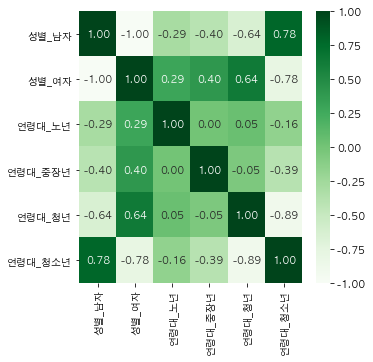

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

# 폰트 설정
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(demodp.corr(),
           annot = True,
           fmt = '.2f',
           cmap = 'Greens',
           vmin = -1, vmax=1)

In [49]:
# r=-1.000 ~ r=-0.600  높은 음의 상관관계
# r=-0.599 ~ r=-0.400  중간 음의 상관관계
# r=-3.999 ~ r=-0.200  낮은 음의 상관관계
# r=-0.199 ~ r=+0.199  무상관
# r=+0.200 ~ r=+0.399  낮은 양의 상관관계
# r=+0.400 ~ r=+0.599  중간 양의 상관관계
# r=+0.600 ~ r=+1.000  높은 양의 상관관계

#### 켄달

In [154]:
import scipy.stats as stats

# kendall
stats.kendalltau(data['성별'], data['연령대'])

KendalltauResult(correlation=-0.47927714488125656, pvalue=1.8557000016556025e-09)

#### 스피어만

In [155]:
# spearman
stats.spearmanr(data['성별'], data['연령대'])

SpearmanrResult(correlation=-0.4973877640140526, pvalue=1.4668109772057938e-10)